# Start

In [1]:
from dhlab.module_update import update, css, code_toggle, printmd
import dhlab.nbtext as nb
import dhlab.graph_networkx_louvain as gnl
import networkx as nx
from dhlab.graph_networkx_louvain import cutdown, make_collocation_graph
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
css()

In [3]:
code_toggle()

In [4]:
def plotfig(a_plot, font_size = 18, legend = 18, loc = 1, title_size = 20):
    #fsize = plt.rcParams["font.size"
    plt.rcParams["font.size"] = font_size
    ax = a_plot
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color("grey")
    ax.spines["left"].set_color("grey")
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.labelsize = font_size
    ax.titlesize = title_size
    plt.legend(loc = loc, prop={'size': legend})

    #plt.rcParams["font.size"] = fsize
    return

In [5]:
def show_cliques(G):
    C = gnl.make_cliques_from_graph(G.to_undirected())
    cliques = [(t, ', '.join(C[1][t])) for t in C[1]]
    cliques.sort(key=lambda x: x[0][1])
    for x, y in cliques:
        print(x, y)
        print()


# Adgang til tekster

## Trendlinjer

## Stedsnavn

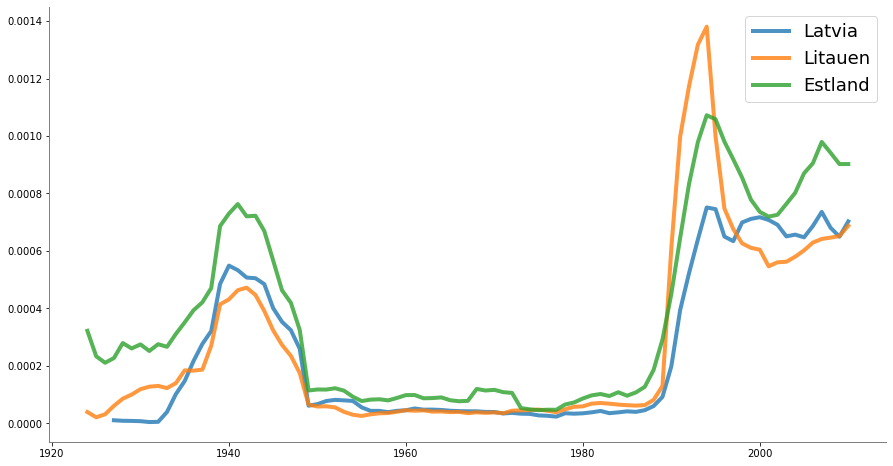

In [6]:
plotfig(
    nb.nb_ngram(
        "Latvia, Litauen, Estland", 
        corpus='avis', 
        years=(1920, 2010), 
        smooth=1).sort_index().rolling(window=5).mean().plot(figsize=(15,8), lw=4, alpha=0.8), 
    legend=18)

## Tyskland, England, USA, Russland

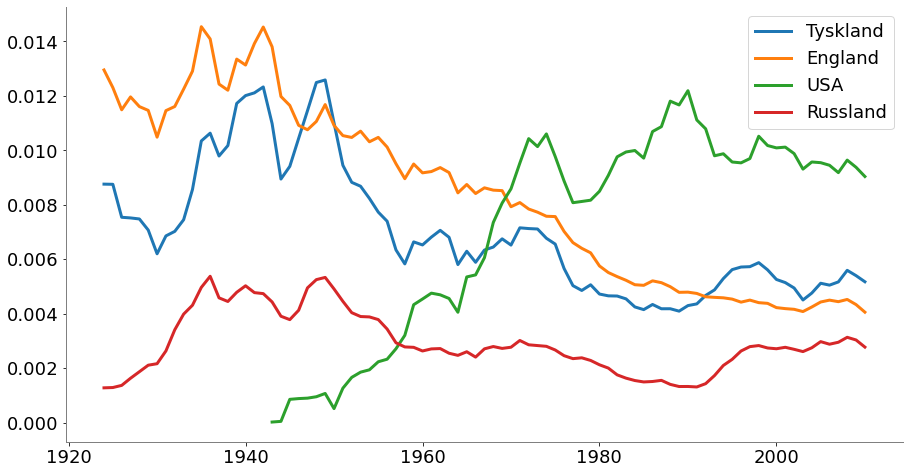

In [7]:
plotfig(
    nb.nb_ngram(
        "Tyskland, England, USA, Russland", 
         years=(1920, 2010), 
         smooth=1
    ).rolling(window=5).mean().plot(figsize=(15,8), lw=3))

## USA, Amerika

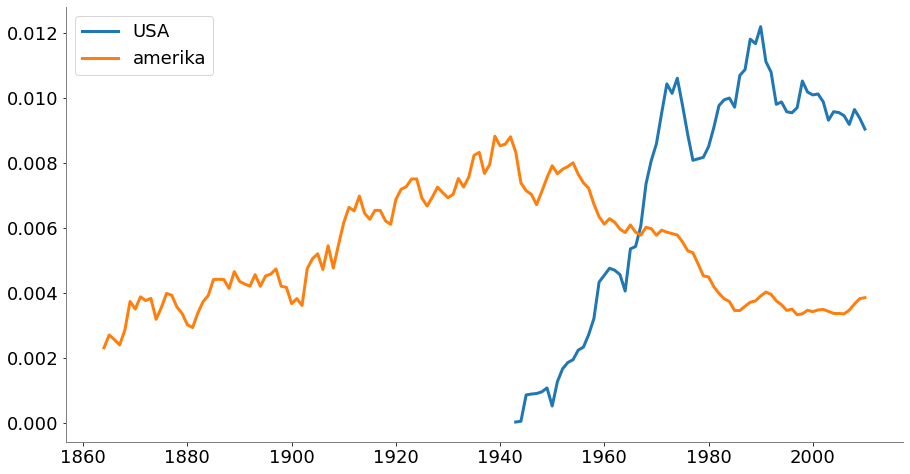

In [12]:
sample1 = nb.nb_ngram(" USA, amerika", years=(1860, 2010), smooth=1).sort_index()
plotfig(sample1.rolling(window=5).mean().plot(figsize=(15,8), lw=3), loc = 2, font_size=18)

## Rusland, Russland

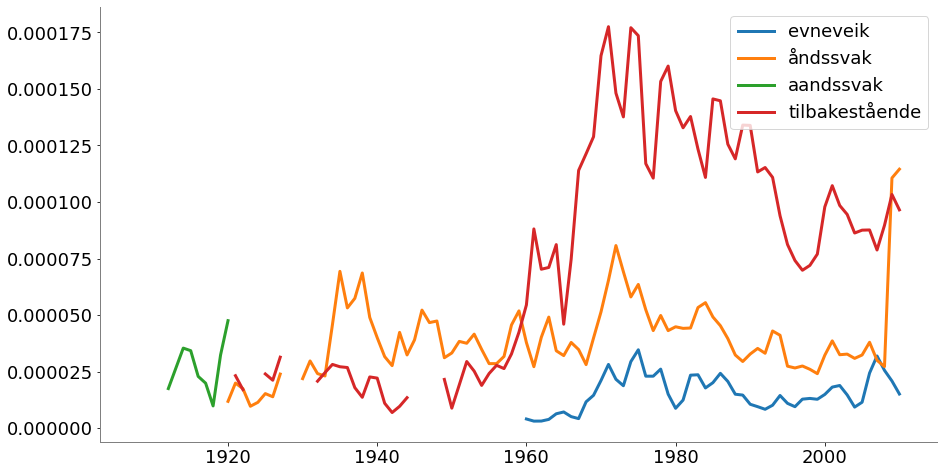

In [18]:
sample2 = nb.nb_ngram("evneveik,åndssvak, aandssvak, tilbakestående", years=(1860, 2010), smooth=1).sort_index()
plotfig(sample2.rolling(window=2).mean().plot(figsize=(15,8), lw=3))

# Ordmodeller

Vi tenker på at ord står i relasjoner til hverandre, tilhøre samme kategori, være semantisk like og andre ting.

## Os

In [19]:
G = nb.make_graph('Os', cutoff = 12)

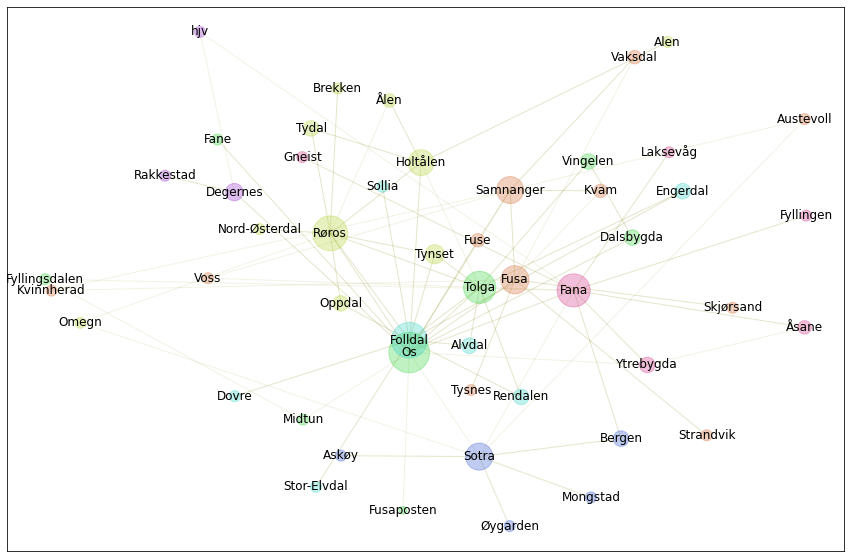

In [20]:
gnl.show_graph(G, spread = 1.9, fontsize=12)

## Clustre (et stedsnavn kan stå bare i ett av clustrene)

In [21]:
gnl.show_community(G)

1 Holtålen, Ålen, Brekken, Oppdal, Røros, Tydal, Omegn, Nord-Østerdal, Tynset, Alen

2 Tolga, Vingelen, Fusaposten, Dalsbygda, Midtun, Fyllingsdalen, Fane, Os

3 Stor-Elvdal, Rendalen, Alvdal, Folldal, Dovre, Engerdal, Sollia

4 Askøy, Bergen, Sotra, Mongstad, Øygarden

5 Degernes, Rakkestad, hjv

6 Gneist, Åsane, Fana, Laksevåg, Ytrebygda, Fyllingen

7 Voss, Kvinnherad, Tysnes, Vaksdal, Kvam, Fuse, Skjørsand, Austevoll, Samnanger, Strandvik, Fusa



True

## Klikker (navnet kan stå i flere)

In [22]:
show_cliques(G)

(3, 1) Rendalen, Tolga, Holtålen, Ålen, Oppdal, Alvdal, Røros, Folldal, Tydal, Tynset, Os, Engerdal

(4, 1) Tolga, Holtålen, Røros, Folldal, Tynset, Os

(3, 2) Kvinnherad, Vaksdal, Kvam, Fuse, Samnanger, Os, Fusa

(3, 3) Åsane, Fana, Bergen, Ytrebygda, Sotra, Os



## Generelle steder

In [25]:
G_vanlig = nb.make_graph('Stuen, stuen, stua', cutoff = 12)

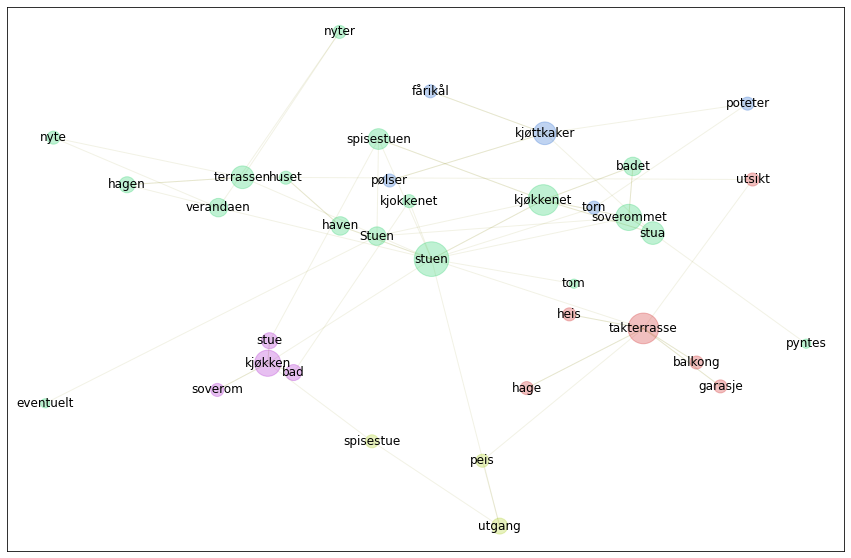

In [26]:
gnl.show_graph(G_vanlig, spread = 1.4, fontsize=12)

## Clustre

In [27]:
gnl.show_community(G_vanlig)

1 peis, utgang, spisestue

2 terrassen, spisestuen, stuen, tom, Stuen, eventuelt, kjøkkenet, badet, huset, pyntes, hagen, kjokkenet, nyte, haven, soverommet, stua, verandaen, nyter

3 torn, kjøttkaker, pølser, poteter, fårikål

4 stue, kjøkken, soverom, bad

5 takterrasse, hage, utsikt, balkong, garasje, heis



True

## Klikker

In [28]:
show_cliques(G_vanlig)

(3, 1) spisestuen, stuen, kjøkkenet, badet, stua, soverommet, Stuen



## Fyll inn andre stedsnavn

In [38]:
G2 = nb.make_graph('Tromsø', cutoff = 20)

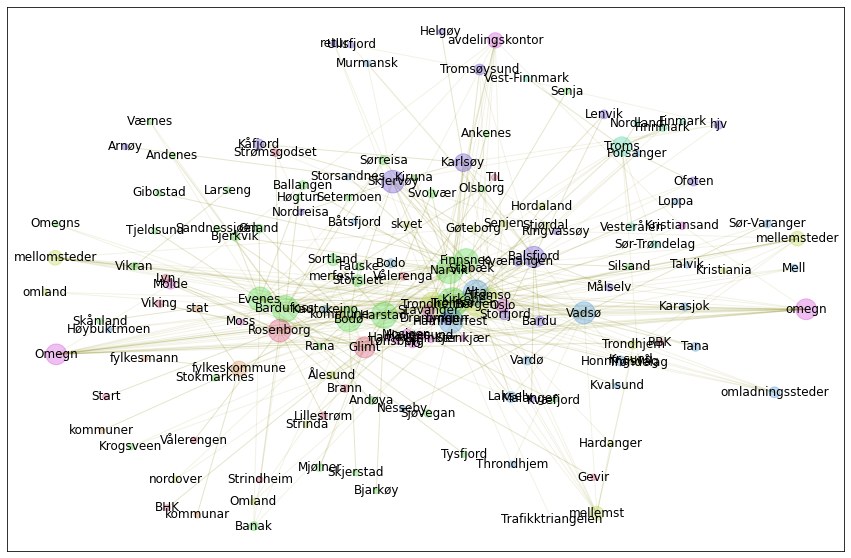

In [39]:
gnl.show_graph(G2, spread = 1.4, fontsize=12)

## Clustre

In [40]:
gnl.show_community(G2)

1 Hardanger, skyet, nordover, Hordaland, Senjen, Kirkenes, mellemst, mellemsteder, Trøndelag, Stjørdal, Gøteborg, Kristiania, Omland, Bergen, omland, Kr.sund, Strinda, Tromso, Trondhjem, merfest, Trondheim, mellomsteder, Ålesund

2 Bjerkvik, Fauske, Sortland, Evenes, Harstad, Narvik, Stokmarknes, Mjølner, Larseng, Skånland, Bodø, Bjarkøy, Ørland, Kiruna, Sandnessjøen, Tysfjord, Kvæfjord, Rana, Banak, Ankenes, Omegns, Tjeldsund, Trafikktriangelen, Krogsveen, Ballangen, Skjerstad, Tromsø, Vikran, Svolvær

3 Finnmark, Vest-Finnmark, Finmark, Vesterålen, Troms, Nordland, Sør-Trøndelag

4 Vadsø, Kautokeino, Talvik, Storsandnes, Alta, Nesseby, Sør-Varanger, Karasjok, Tana, Murmansk, Porsanger, Kvalsund, Mell, Hammerfest, omladningssteder, Vardø, Bodo, Båtsfjord, Lakselv, Høybuktmoen, Loppa, Throndhjem, Honningsvåg

5 Ullsfjord, Skjervøy, Balsfjord, Nordreisa, Bardu, Kåfjord, Ofoten, Ringvassøy, Kvænangen, Målselv, Malangen, Karlsøy, Tromsøysund, Arnøy, Lyngen, Lenvik, Helgøy, retur, Storfjor

True

## Klikker

In [41]:
show_cliques(G2)

(3, 1) fylkeskommune, Oslo, Vadsø, Bjerkvik, Lillestrøm, Skjervøy, Bardu, Kåfjord, Sør-Varanger, Evenes, Kirkenes, Karasjok, mellemst, Narvik, Finnsnes, mellemsteder, Rosenborg, Kristiansand, Tana, Bardufoss, Kvænangen, Porsanger, Ringvassøy, Mosjøen, Glimt, Bodø, Mell, Tromsøysund, omladningssteder, Lyngen, Ørland, Vardø, Stavanger, Vesterålen, hjv, omland, Lakselv, Sørreisa, Molde, Omegns, Trondhjem, Ålesund, Svolvær, Vålerenga, Sortland, Hardanger, Ullsfjord, nordover, Storslett, Balsfjord, Steinkjer, Alta, Trondheim, Harstad, avdelingskontor, Viking, Ballangen, Karlsøy, Hammerfest, Haugesund, Kristiania, Omland, Værnes, Mo, Andøya, Bodo, Storfjord, Bergen, mellomsteder, Rana, Brann, Banak, Høybuktmoen, Sjøvegan, Throndhjem, Tromso, omegn, Omegn, Troms, Fauske, Strømsgodset, Tromsø, Lyn, Honningsvåg

(4, 1) Oslo, Vadsø, Hammerfest, Sortland, Bodø, Mo, Storslett, Bodo, Stavanger, Bergen, Alta, Banak, Evenes, Lakselv, Kirkenes, mellemst, Harstad, Finnsnes, Narvik, avdelingskontor, mel

# Relaterte ord

kommandoen finner lignende ord

In [42]:
nb.relaterte_ord('Tønsberg')

['Tønsberg',
 'Sandefjord',
 'omegn',
 'Omegns',
 'Horten',
 'Omegn',
 'Skien',
 'Oplands',
 'Larvik',
 'Drammen',
 'Fredrikstad',
 'omegns',
 'Holmestrand',
 'Stokke',
 'Moss',
 'Nøtterøy',
 'hjv',
 'Vestfold',
 'Omland',
 'omland']

In [43]:
nb.relaterte_ord('Bergen')

['Bergen',
 'omegn',
 'Omegn',
 'omland',
 'mellemsteder',
 'Omland',
 'mellemst',
 'mellomsteder',
 'Trondheim',
 'Kristiansand',
 'Stavanger',
 'Ålesund',
 'Hordaland',
 'Hardanger',
 'Nordhordland',
 'Haugesund',
 'Voss',
 'Mell',
 'Tromsø',
 'Kirkenes']

In [44]:
nb.relaterte_ord('kjøkkenet')

['spiste',
 'drakk',
 'kjøkkenet',
 'soverommet',
 'badet',
 'lager',
 'stua',
 'koste',
 'stekte',
 'restauranten',
 'vaskerommet',
 'spisestuen',
 'bakte',
 'spisesalen',
 'hentet',
 'koke',
 'lage',
 'stuen',
 'sov',
 'røkte']

# Bøker og aviser



## Korpus som en samling referanser til bøker, ikke selve bøkene

Hvordan bygge korpus avhenger av materialtypen, bøker, tidsskrift eller aviser. Bøker har rike metadata, og inngår i verksdefinisjoner, mens aviser har en rikere tidsakse, fra dag til dag.

In [50]:
korpus = nb.book_corpus(words=['Bergen'], period = (1980, 2000), ddk="839%", lang='nob', limit = 200)
korpus

,urn,author,title,year
0,2010032213003,"Wergeland, Henrik",Spanjolen ; Den engelske los ; Hasselnøtter,1997
1,2008100104077,"Baumgartner, Walter",modernistiske Hamsun,1998
2,2007110804087,"Staalesen, Gunnar","Rygg i rand, to i spann",1990
3,2016062148073,"Undset, Sigrid",Middelalder-verker,1982
4,2008012904008,"Kjærstad, Jan",Forføreren,1993
...,...,...,...,...
195,2012102907068,"Sandberg, Liv",Mer om To hus tett i tett og vi som bor her,1987
196,2008010704068,"Sandemo, Margit",Frostens datter,1994
197,2013080238046,"Bollvåg, Merete Andersen",Kjærlighetsbegrepet i Sigurd Hoels forfatterskap,1981
198,2007111304069,"Steenstrup, Knut M.",Dilemma,1989


# Konkordanser 

In [48]:
nb.concordance('Bergen', 
    before = 10,
    after = 10,
    corpus = 'bok', # bytt ut med avis for å se i aviser
    size = 5)

",My fair lady,1996",utdannelse med bl . a . musikkstudier ved universitetet i,Bergen,"samt Statens Teaterhøgskole , studieopphold ved Theatre du Soleil ,"
",My fair lady,1996",Barba . Hun har vært tilknyttet Den Nationale Scene i,Bergen,", Oslo Nye og Nationaltheatret . Her har hun hatt"
",My fair lady,1996",samarbeidsprosjekt med Cecilie Løveid og Synne Skouen for Festspillene i,Bergen,. For Festspillene har hun også regissert « Pierrot Lunaire
"Øyen, P.A.,Kvartær-studier i den sydøstlige del af vort land,1908",lignende # type som var . groenlandica fra Vardø og,Bergen,. Seiv har jeg fundet den samme type som recent
",Samtaler med Jens Bjørneboe,1987",på bakgrunn av dette at Jens Bjørneboe er kommet til,Bergen,", og har gjemt seg vekk på Hotell Rosenkrantz hvor"
",Samtaler med Jens Bjørneboe,1987",og da legge sterk vekt på de onde årene i,Bergen,og i Kristiania etterpå . Da Ibsen endelig fikk stipendium
",Samtaler med Jens Bjørneboe,1987",spilt ikke minst på de små teatre . Men i,Bergen,", Stavanger og Trondheim vil ikke teatersjefene ha det ."
"Arnestad, Georg,Fritidskulturlivet i Norge,1997",None,Bergen,", juni 1997"
"Arnestad, Georg,Fritidskulturlivet i Norge,1997",Sogndal /,Bergen,", 23.3.1997"
"Arnestad, Georg,Fritidskulturlivet i Norge,1997",eit studentarbeid frå forfattaranes eiga studietid ved Noregs handelshøgskole i,Bergen,"i 1970. Søkjer vi på « amatørkunst » , får"
"Arnestad, Georg,Fritidskulturlivet i Norge,1997",dette å være viktig i de tre minste byene (,Bergen,", Trondheim , Stavanger ) . I tillegg er det"


In [49]:
nb.concordance(
    'Paris', 
    before = 10,
    after = 10,
    title = 'stavanger%',
    corpus = 'avis', # bytt ut med avis for å se i aviser
    yearfrom = 1990,
    yearto = 2000,
    size = 5)

stavangeraftenblad-19900104,blant annet Air France og selskapets rute fra Stavanger til,Paris,", sier Arne Helvik . Chartertrafikken over Sola er den"
stavangeraftenblad-19900104,Odd Arild Olsen . Marlene Dietrich utnevnt kommandør av Æreslegionen,Paris,"( NTB-Reuter ) : Marlene Dietrich , den legendariske tyskfødte"
stavangeraftenblad-19900104,tilbaketrukket i en leilighet i nærheten av Champs Elysees i,Paris,", selv om hun ble amerikansk statsborger i 1937. Hun"
stavangeraftenblad-19900104,09.30 Eurosport Menu . 10.00 Wolleyball World Cup . 11.00,Paris,- Dakar Rally . 12.00 Indoor Handball . 13.00 Skiiumping
stavangeraftenblad-19900104,. 19.30 Surfer Magazine . 20.00 Indoor Handball . 21.00,Paris,- Dakar Rally . 22.00 Best of the Year .
stavangeraftenblad-19910409,de legendariske « Bluebell jentene » i Folies Bergere i,Paris,. ( 4 : 8 ) . Stavanger Aftenblad ■
stavangeraftenblad-19910415,ha samtaler med dets ledere . Han skal også besøke,Paris,for å møte franske toppolitikere og inspisere anleggene for •
stavangeraftenblad-19910415,- tallet etter mønster f ra Hayters Atelier 17 i,Paris,. Det ble snart et internasjonalt samlingssted for kunstnere som
stavangeraftenblad-19910415,". 2,526 .1 - 0.8 Frankfurt , FAZ 672.5 0.1",Paris,", C AC . 1,821 .4 - 1.6 Milano 594.2"
stavangeraftenblad-19910415,S / A ble stiftet i 1958 med hovedkontor i,Paris,". Firmaet begynte med geologisk / syntetiske studier , foto"


# Stedsnavn i bøker

Lager oss en samling ord å sammenligne med. Henter ned alt fra bokhylla, eller bøker i nettbiblioteket. Basert på 450 000 bøker.

In [51]:
tot = nb.frame(nb.totals(150000), "tot")
nb.normalize_corpus_dataframe(tot)

True

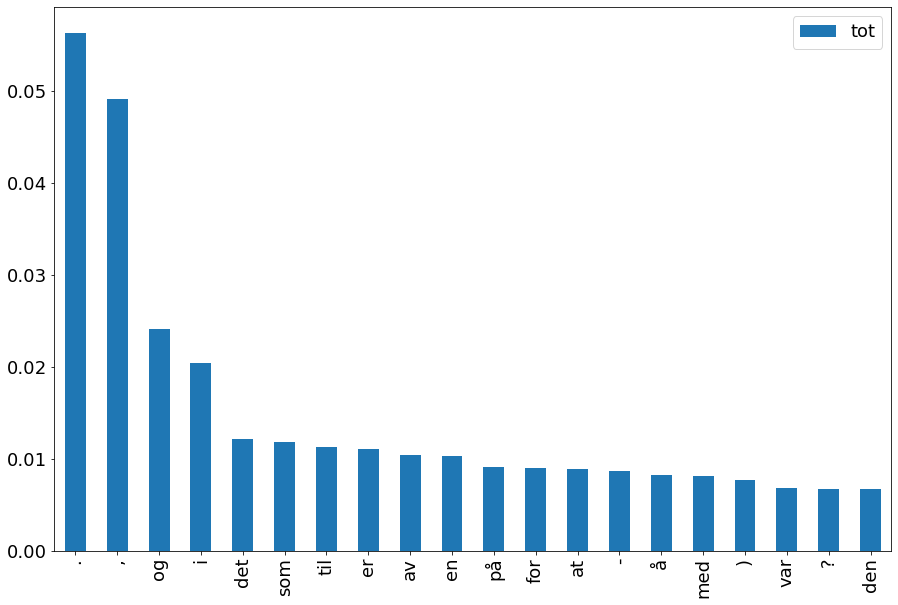

In [53]:
tot.head(20).plot(kind='bar')

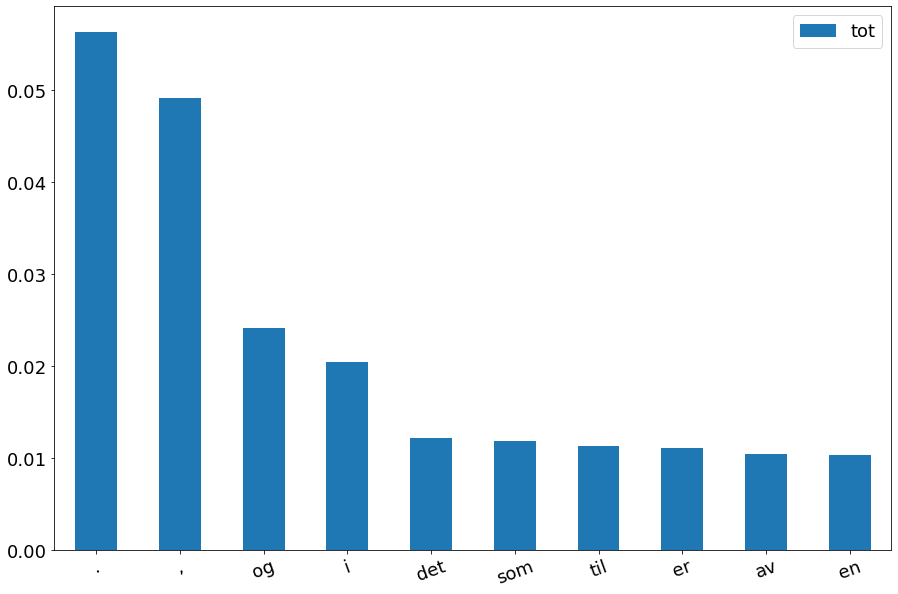

In [55]:
tot.head(10).plot(kind='bar', rot = 20)

Deretter spør vi etter

In [54]:
coll2 = nb.urn_coll('Bergen', urns= list(korpus.urn))

In [58]:
coll2.head(10)

,0
i,0.063206
",",0.059247
.,0.054705
og,0.027644
til,0.025438
var,0.013498
fra,0.012395
?,0.010772
en,0.010448
på,0.010253


In [57]:
nb.normalize_corpus_dataframe(coll2)

True

In [59]:
diff2 = nb.frame(coll2[0]**1.2/tot.tot).sort_values(by = 0, ascending = False)

In [60]:
d2 = nb.frame(diff2[0].loc[[x for x in diff2.index if x.isalpha()]])

Se på de ordene som skiller seg mest, som frekvensliste eller ordsky

In [62]:
d2.head(50)

,0
Festspillene,454.022458
nattoget,240.496975
Håkonshallen,203.991218
kroningen,179.186984
Skakke,165.523164
Steinerskolen,137.154405
Politikammer,121.375766
humorist,112.676479
Eides,110.569495
Sørebø,97.514034


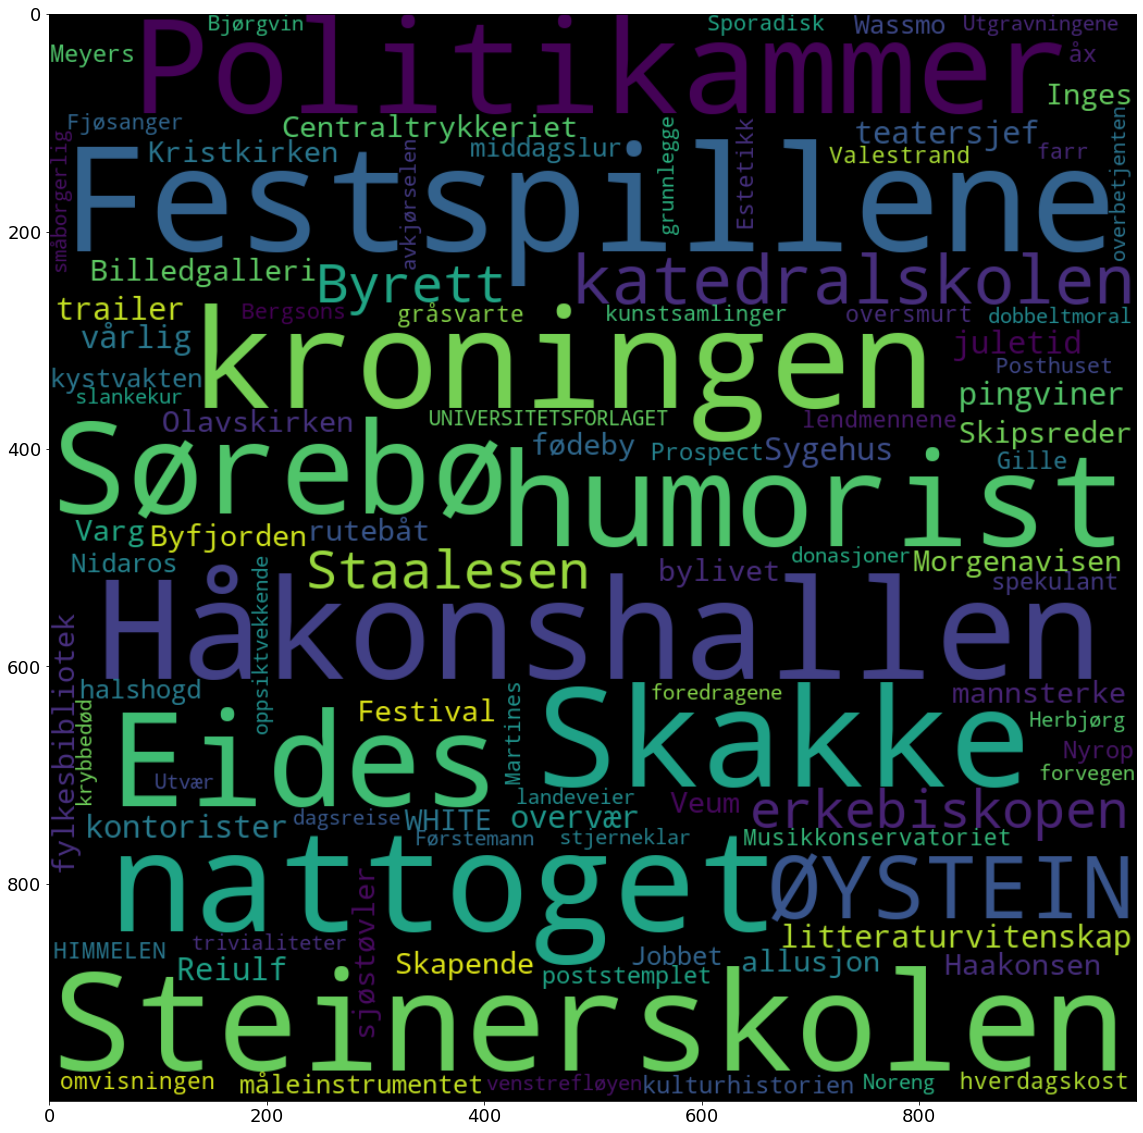

In [63]:
nb.cloud(d2.head(100)/d2.head(100).sum(), stretch=4)

# Navn

In [64]:
books = nb.book_corpus(author ='hjort%vigdis%')

In [65]:
books

,urn,author,title,year
0,2013040906028,"Hjorth, Vigdis","Takk, ganske bra",2009
1,2014030506013,"Hjorth, Vigdis",Sandnes City,2010
2,2009042004056,"Hjorth, Vigdis",Hysj,1997
3,2008081904025,"Hjorth, Vigdis","Takk, ganske bra",1998
4,2014051306007,"Hjorth, Vigdis",Tredje person entall,2009
5,2013042906001,"Hjorth, Vigdis",Gjennom skogen,1986
6,2008111904076,"Hjorth, Vigdis",Hva er det med mor,2001
7,2007111201053,"Hjorth, Vigdis",Fransk åpning,1992
8,2015050408036,"Hjorth, Vigdis",Jørgen + Anne er sant,1994
9,2013111908004,"Hjorth, Vigdis",På hjørnet om kvelden,1994


In [66]:
book = 2007111904047

In [69]:
nb.metadata(book)

[[2007111904047,
  'Hjorth, Vigdis',
  1991,
  'Med hånden på hjertet',
  '',
  'Cappelen',
  'fiction',
  '8eee52ff2a6408575108e324f3b19bc0',
  'nob',
  '']]

In [67]:
F = nb.navn(book)

In [68]:
F

{'Afrika': 4,
 'Ambj': 5,
 'Anne': 10,
 'Arvid': 2,
 'Asmervik': 2,
 'Augustin': 3,
 'Ave': 3,
 'Axel': 2,
 'B-blokken': 3,
 'Bech': 6,
 'Bereng': 2,
 'Bergen': 17,
 'Bergens': 3,
 'Bj': 6,
 'Bravo': 3,
 'Breivik': 4,
 'Britain': 2,
 'Brun': 3,
 'Bryggen': 3,
 'Christensen': 7,
 'Cort': 3,
 'Dagens': 3,
 'Dea': 2,
 'Der': 11,
 'Dios': 2,
 'Du': 37,
 'Egners': 2,
 'Eirin': 3,
 'Ekre': 48,
 'Ekres': 16,
 'Ella': 3,
 'Ellen': 18,
 'Ellens': 3,
 'Fellesr': 2,
 'Fidelis': 2,
 'Fikk': 3,
 'Finnmark': 3,
 'Fire': 4,
 'Forberedende': 2,
 'Fr': 43,
 'Frankrike': 3,
 'Fredrik': 64,
 'Fredriks': 13,
 'Fy': 2,
 'Gj': 4,
 'Glem': 3,
 'God': 2,
 'Goran': 2,
 'Gud': 14,
 'Gundersen': 3,
 'Hallo': 2,
 'Hanna': 21,
 'Hanssen': 2,
 'Har': 22,
 'Harald': 77,
 'Hasj': 2,
 'Hatleberg': 12,
 'Haug': 12,
 'Hei': 10,
 'Heidegger': 2,
 'Helle': 4,
 'Helleveien': 8,
 'Her': 2,
 'Hill': 2,
 'Historisk-filosofisk': 2,
 'Hjelp': 3,
 'Hjorth': 3,
 'Hm': 3,
 'Huffda': 3,
 'Hvordan': 23,
 'Hvorfor': 12,
 'Ingenting':

In [70]:
Removals = nb.spurious_names(300)

In [71]:
Removals = Removals + ['Hvem', 'Hva', 'Hvorfor', 'Hei', 'Okay']

In [72]:
Fn = nb.check_navn(F, remove=Removals)

In [74]:
Fn

{'Afrika': 4,
 'Ambj': 5,
 'Anne': 10,
 'Augustin': 3,
 'Ave': 3,
 'B-blokken': 3,
 'Bech': 6,
 'Bergen': 17,
 'Bergens': 3,
 'Bj': 6,
 'Bravo': 3,
 'Breivik': 4,
 'Brun': 3,
 'Bryggen': 3,
 'Christensen': 7,
 'Cort': 3,
 'Dagens': 3,
 'Eirin': 3,
 'Ekre': 48,
 'Ekres': 16,
 'Ella': 3,
 'Ellen': 18,
 'Ellens': 3,
 'Finnmark': 3,
 'Fire': 4,
 'Fr': 43,
 'Frankrike': 3,
 'Fredrik': 64,
 'Fredriks': 13,
 'Gj': 4,
 'Glem': 3,
 'Gud': 14,
 'Gundersen': 3,
 'Hanna': 21,
 'Harald': 77,
 'Hatleberg': 12,
 'Haug': 12,
 'Helle': 4,
 'Helleveien': 8,
 'Hjelp': 3,
 'Hjorth': 3,
 'Hm': 3,
 'Huffda': 3,
 'Ingenting': 4,
 'Ingvar': 5,
 'Ja-': 7,
 'Jaa': 4,
 'Jacobsen': 4,
 'Jada': 6,
 'Javel': 6,
 'Johan': 11,
 'John': 3,
 'Joo': 3,
 'Kors': 4,
 'Kristine': 9,
 'Lars': 8,
 'Lennons': 3,
 'Les': 4,
 'Maria': 4,
 'Marianne': 9,
 'Merete': 43,
 'Naar': 3,
 'Nei': 51,
 'Neida': 5,
 'Neivel': 3,
 'Nietzsche': 3,
 'Nils': 3,
 'Norges': 9,
 'Nyg': 5,
 'Ola': 4,
 'Otono': 3,
 'Pauli': 4,
 'Paulis': 4,
 'Per'

In [75]:
Fg = nb.make_network_graph(book, Fn)

In [76]:
print(nb.metadata(book))

[[2007111904047, 'Hjorth, Vigdis', 1991, 'Med hånden på hjertet', '', 'Cappelen', 'fiction', '8eee52ff2a6408575108e324f3b19bc0', 'nob', '']]


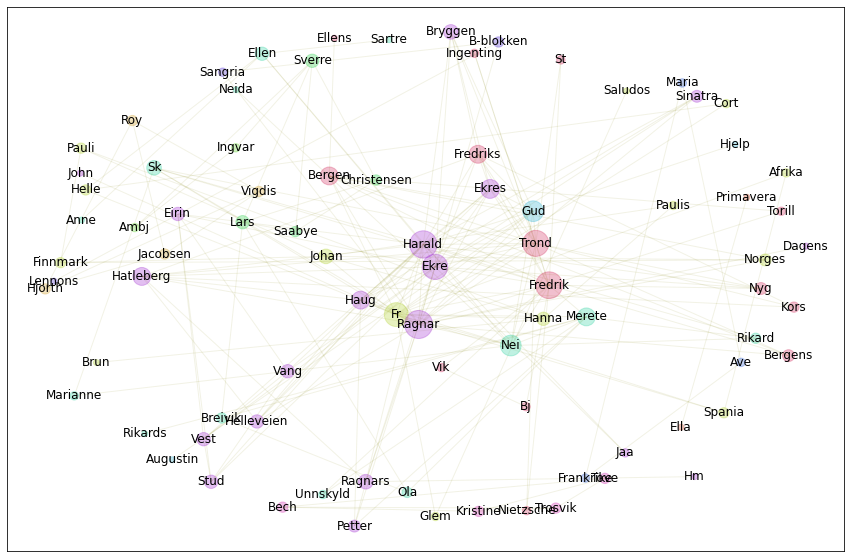

In [77]:
gnl.show_graph(Fg, spread=1.5, fontsize=12)

# Clustring av navn

In [78]:
gnl.show_communities(Fg)

Fr-Johan :  Fr, Johan, Hanna, Norges, Pauli, Finnmark, Helle, Spania, Afrika, Paulis, Cort, Glem, Brun, Saludos

Ambj-Ingvar :  Ambj, Ingvar

Lars-Sverre :  Lars, Sverre, Saabye, Christensen

Nei-Merete :  Nei, Merete, Sk, Ellen, Breivik, Ola, Rikard, Marianne, Unnskyld, Anne, Sartre, Rikards, Neida

Ragnar-Harald :  Ragnar, Harald, Ekre, Gud, Ekres, Haug, Hatleberg, Bryggen, Ragnars, Stud, Vang, Eirin, Vest, Helleveien, Sinatra, Petter, Jaa, Dagens, Hjelp, Hm, Augustin, John

Ave-Maria :  Ave, Maria, Frankrike

B-blokken-Sangria :  B-blokken, Sangria, Lennons

Kristine-Tove :  Kristine, Tove, Bech, Trosvik

Fredrik-Trond :  Fredrik, Trond, Bergen, Fredriks, Nyg, Bergens, Kors, Vik, St, Bj, Ingenting, Torill, Nietzsche, Ellens

Primavera-Ella :  Primavera, Ella

Hjorth-Roy :  Hjorth, Roy, Jacobsen, Vigdis



# Analyse av enkeltbok

In [ ]:
nb.plot_book_wordbags(book, gnl.community_dict(Fg)).plot(figsize=(15,8), lw=3, alpha=0.5);

# Nettverksstruktur 

In [ ]:
nb.cloud(nb.frame(dict(nb.central_betweenness_characters(Fg, 80))), stretch=3);

# Agnar Mykle, Sangen om den Røde Rubin

In [ ]:
nb.book_corpus(author = 'Mykle%', title = 'sang%', period = (1955, 2010))

In [ ]:
navn = nb.navn('2016020808126')

In [ ]:
navn = nb.check_navn(navn, limit=10)

In [ ]:
navn

In [ ]:
G = nb.make_network(2016020808126, navn)

In [ ]:
gnl.show_graph(G)

In [ ]:
gnl.show_communities(G)

## Development of clusters

In [ ]:
nb.plot_book_wordbags(2016020808126, gnl.community_dict(G)).plot(figsize=(15,6), lw=3, alpha=0.5);